### Advanced Coding Group 276661 - Biology Project

This is the code file where we analysed the htionet graph and found valuable insight into relationships between biological entities, and concluded by helping the treatment of a symptom through data analysis.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import pickle

### Task 1 - Constructing the biomedical knowledge graph

We first load the nodes and edges into pandas dataframes

In [2]:
nodes = pd.read_csv("./hetionet-v1.0-nodes.tsv", sep="\t")
edges = pd.read_csv("./edges.sif", sep="\t")

In [103]:
edges.head()

,source,metaedge,target
0,Gene::9021,GpBP,Biological Process::GO:0071357
1,Gene::51676,GpBP,Biological Process::GO:0098780
2,Gene::19,GpBP,Biological Process::GO:0055088
3,Gene::3176,GpBP,Biological Process::GO:0010243
4,Gene::3039,GpBP,Biological Process::GO:0006898


In [104]:
nodes.head()

,id,name,kind
0,Anatomy::UBERON:0000002,uterine cervix,Anatomy
1,Anatomy::UBERON:0000004,nose,Anatomy
2,Anatomy::UBERON:0000006,islet of Langerhans,Anatomy
3,Anatomy::UBERON:0000007,pituitary gland,Anatomy
4,Anatomy::UBERON:0000010,peripheral nervous system,Anatomy


We have laoded the data, now we will build the biomedical knowledge graph by creating an nx DiGraph and adding, for each node:
- ID
- Name
- Kind
- Incoming and Outgoing edges
- Edgetypes (metaedges)

Disclaimer: Graph can be loaded from a file in the cell below the next

In [3]:
edgelist = nx.DiGraph()

#Adding nodes
for index, row in nodes.iterrows():
    edgelist.add_node(row['id'], name=row['name'], kind=row['kind'])

#Adding edges
for index, row in edges.iterrows():
    edgelist.add_edge(row['source'], row['target'], type=row['metaedge'])

KeyboardInterrupt: 

It is possible to save the graph, if you have already saved it, load it in the cell below the next 

In [37]:
#lets save our graph
#import pickle
#with open('graph.gpickle', 'wb') as f:
    #pickle.dump(edgelist, f)

In [4]:
#If you have already saved the graph, load it here:
with open('graph.gpickle', 'rb') as f:
    edgelist = pickle.load(f)

### Task 2 - Analyzing the biomedical knowledge graph

(1) - Compute and list the total number of entities for each unique kind.

We can do this by using the value_counts function on our nodes dataframe. We solve point (2) in a similar way.

In [39]:
nodes["kind"].value_counts()

kind
Gene                   20945
Biological Process     11381
Side Effect             5734
Molecular Function      2884
Pathway                 1822
Compound                1552
Cellular Component      1391
Symptom                  438
Anatomy                  402
Pharmacologic Class      345
Disease                  137
Name: count, dtype: int64

(2) - Compute and list the total number of each unique edge type.

In [40]:
edges["metaedge"].value_counts()

metaedge
GpBP    559504
AeG     526407
Gr>G    265672
GiG     147164
CcSE    138944
AdG     102240
AuG      97848
GpMF     97222
GpPW     84372
GpCC     73566
GcG      61690
CdG      21102
CuG      18756
DaG      12623
CbG      11571
DuG       7731
DdG       7623
CrC       6486
DlA       3602
DpS       3357
PCiC      1029
CtD        755
DrD        543
CpD        390
Name: count, dtype: int64

##### (3) - Compute the average in-degree and out-degree, for each type of node. 

We compute the average in and out degree for each node by:
- Getting the in and out degrees for all the nodes and placing them into a dictionary
- create a dict where for each node-type we have two lists, where we add, for each node in that type category, its in and out degree 
- after that, we modify the dictionary values by averaging both lists

In [5]:
#Calculating in-degree and out-degree for all nodes
in_degrees = dict(edgelist.in_degree())
out_degrees = dict(edgelist.out_degree())

#Preparing to aggregate degrees by node type
node_types = nx.get_node_attributes(edgelist, 'kind')
print(node_types)
degrees = {}
for i in set(node_types.values()):
    degrees[i] = [[], []] # [in-degrees, out-degrees]

#Aggregating in and out-degrees by type
for node in edgelist.nodes():
    node_type = node_types[node]
    degrees[node_type][0].append(in_degrees[node])
    degrees[node_type][1].append(out_degrees[node])

#Calculating average degrees 
for node_type in degrees:
    degrees[node_type] = (sum(degrees[node_type][0]) / len(degrees[node_type][0]), sum(degrees[node_type][1]) / len(degrees[node_type][1]))

#Dataframe with average in and out-degree for each type of node
deg_df = pd.DataFrame(degrees, index=["In-degree", "Out-degree"]).T

{'Anatomy::UBERON:0000002': 'Anatomy', 'Anatomy::UBERON:0000004': 'Anatomy', 'Anatomy::UBERON:0000006': 'Anatomy', 'Anatomy::UBERON:0000007': 'Anatomy', 'Anatomy::UBERON:0000010': 'Anatomy', 'Anatomy::UBERON:0000011': 'Anatomy', 'Anatomy::UBERON:0000013': 'Anatomy', 'Anatomy::UBERON:0000020': 'Anatomy', 'Anatomy::UBERON:0000026': 'Anatomy', 'Anatomy::UBERON:0000029': 'Anatomy', 'Anatomy::UBERON:0000033': 'Anatomy', 'Anatomy::UBERON:0000038': 'Anatomy', 'Anatomy::UBERON:0000042': 'Anatomy', 'Anatomy::UBERON:0000043': 'Anatomy', 'Anatomy::UBERON:0000045': 'Anatomy', 'Anatomy::UBERON:0000053': 'Anatomy', 'Anatomy::UBERON:0000054': 'Anatomy', 'Anatomy::UBERON:0000056': 'Anatomy', 'Anatomy::UBERON:0000057': 'Anatomy', 'Anatomy::UBERON:0000165': 'Anatomy', 'Anatomy::UBERON:0000178': 'Anatomy', 'Anatomy::UBERON:0000211': 'Anatomy', 'Anatomy::UBERON:0000473': 'Anatomy', 'Anatomy::UBERON:0000474': 'Anatomy', 'Anatomy::UBERON:0000482': 'Anatomy', 'Anatomy::UBERON:0000483': 'Anatomy', 'Anatomy::U

In [5]:
display(deg_df)

,In-degree,Out-degree
Side Effect,24.231601,0.000000
Anatomy,8.960199,1462.261194
Pathway,46.307355,0.000000
Pharmacologic Class,0.000000,2.982609
Biological Process,49.161234,0.000000
Molecular Function,33.710818,0.000000
Symptom,7.664384,0.000000
Gene,54.452232,61.507424
Cellular Component,52.887132,0.000000
Compound,4.842139,127.538015


### Analysis:
(1) - For each “Disease” compute the number of connections (in-degree and out-degree) 
and show the most connected diseases.

We will find all diseases, but show the top 5 highest in-degrees, out-degrees and "total" degrees i.e. in-deg + out-deg

In [6]:
#Lets compute in and out degrees for diseases
diseases = list(nodes[nodes['kind'] == "Disease"]['id']) # all disease IDs
disdegs = {}
for disease in diseases:
    indeg = edgelist.in_degree(disease) if isinstance(edgelist.in_degree(disease), int) else 0
    outdeg = edgelist.out_degree(disease) if isinstance(edgelist.out_degree(disease), int) else 0
    disdegs[disease] = {"in" : indeg, "out" : outdeg}

In [7]:
#Lets get themost connected diseases
def get_top_entries(dictionary, top_n=5):
    top_in_entries = []
    top_out_entries = []

    sorted_by_in = sorted(dictionary.items(), key=lambda x: x[1]['in'], reverse=True)
    sorted_by_out = sorted(dictionary.items(), key=lambda x: x[1]['out'], reverse=True)

    for i in range(min(top_n, len(sorted_by_in))):
        top_in_entries.append(sorted_by_in[i][0])
    for i in range(min(top_n, len(sorted_by_out))):
        top_out_entries.append(sorted_by_out[i][0])

    return top_in_entries, top_out_entries

top_in_diseases, top_out_diseases = get_top_entries(disdegs)

In [8]:
#What are the diseases with the highest in-degree?
for d in top_in_diseases:
    name = nodes[nodes['id']==d]['name'].iloc[0]
    print(name, ": in-degree =", disdegs[d]['in'])

hypertension : in-degree = 73
hematologic cancer : in-degree = 53
breast cancer : in-degree = 44
asthma : in-degree = 41
coronary artery disease : in-degree = 40


In [8]:
#What are the diseases with the highest out-degree?
for d in top_out_diseases:
    name = nodes[nodes['id']==d]['name'].iloc[0]
    print(name, ": out-degree =", disdegs[d]['out'])

breast cancer : out-degree = 1079
hematologic cancer : out-degree = 1033
IgA glomerulonephritis : out-degree = 948
melanoma : out-degree = 917
rheumatoid arthritis : out-degree = 842


In [9]:
#So, what are the most connected diseases overall? (total degree is sum of in and out degree)
dis_total_degrees = {d : disdegs[d]['in'] + disdegs[d]['out'] for d in disdegs}
#sort diseases by total degree
top_total_diseases = sorted(dis_total_degrees, key=dis_total_degrees.get, reverse=True)
for d in top_total_diseases[:5]:
    name = nodes[nodes['id']==d]['name'].iloc[0]
    print(name, ": total degree =", dis_total_degrees[d])

breast cancer : total degree = 1123
hematologic cancer : total degree = 1086
IgA glomerulonephritis : total degree = 948
melanoma : total degree = 930
rheumatoid arthritis : total degree = 880


### Analysis:
(2) - Compute  the  sub-graph  of  “Disease”  and  “Symptom”.  And  compute  the  average 
number of connections between a disease and a symptom. 

- We create a subgrap with only diseases and symptoms
- We compute the average number of connections between symptoms and diseases as the number of edges between diseases and symptoms divided by the number of diseases.
- reminder: in his graph diseases go to symptoms, i.e. symptoms have indegrees from diseases

In [9]:
#Function to get a subgraph with a list of node types
def subg(graph, liste):
    subgraph = [node for node, attr in graph.nodes(data=True) if attr['kind'] in liste]
    subgraph = graph.subgraph(subgraph)
    return subgraph

#Subgraph with just diseases and symptoms
symdis_subgraph = subg(edgelist, ['Disease', 'Symptom'])

In [10]:
#Let's get the average number of edges between dseases and symptoms
#We already have Disease IDs in diseases variable
symptoms = nodes[nodes['kind']=="Symptom"]['id']
total_symdis_edges = 0
for disease in diseases:
    for symptom in symptoms:
        total_symdis_edges += symdis_subgraph.has_edge(disease, symptom) #Will return True i.e. 1 if there is an edge
#Calculate the average number of edges between the two node types
average_symdis_edges = total_symdis_edges / len(diseases)
print("Average number of connectios between a disease and a symptom: ",average_symdis_edges)    

Average number of connectios between a disease and a symptom:  24.503649635036496


### Analysis
(3) - Compute the similarity between “type  1  diabetes  mellitus”  and “type  2  diabetes 
mellitus”

To assess similarity between a pair of diseases, we define the following measures:
- **Shared symptoms:** We check for the shared symptoms between the two diseases to assess similarity.
- **Shared genes:** We check for the shared genes between the two diseases.
- **Shared compounds causing disease:** We check for the shared compounds causing the disease between the two diseases.
- **Shared diseases:** We check for how many connections to other diseases the two diseases have in commom. An edge from a disease to another means that there the disease resembles the other
- **Check edge between the two diseases:** Presence of an edge between the two diseases would mean they are similar

Below, a simple neighbor similarity and a predecessor/successor one are defined

In [11]:
#This function computes similarity between two nodes by checking both 
    # predecessors and successors they have in common, it is the most basic similarity measure
def neighbor_similarity(node1, node2, G):
    node1_neighbors = set(G.successors(node1)).union(set(G.predecessors(node1)))
    node2_neighbors = set(G.successors(node2)).union(set(G.predecessors(node2)))
    intersection = node1_neighbors.intersection(node2_neighbors)
    union = node1_neighbors.union(node2_neighbors)
    similarity = round(len(intersection) / len(union) if union else 0, 3)
    return f'{similarity} ({len(intersection)} / {len(union)})'

#This function computes similarity between two nodes by checking predecessors in common by default and successors in common if specified
def similarity(node1, node2, graph, pred=True):
    if pred:
        neighbors1 = set(graph.predecessors(node1))
        neighbors2 = set(graph.predecessors(node2))
    else:
        neighbors1 = set(graph.successors(node1))
        neighbors2 = set(graph.successors(node2))
    intersection = neighbors1.intersection(neighbors2)
    union = neighbors1.union(neighbors2)
    similarity = round(len(intersection) / len(union) if union else 0, 3)
    return f'{similarity} ({len(intersection)} / {len(union)})'

We define the functions to more efficiently navigate the network

In [12]:
#This function allows to get the id of a node by its name
def get_id_by_name(name, graph):
    for node, data in graph.nodes(data=True):
        if data.get('name') == name:
            return node
    return None

#This function allows to get the name of a node by its id
def get_name_by_id(id, graph):
    for node, data in graph.nodes(data=True):
        if node == id:
            return data.get('name')
    return None

type1_diab = get_id_by_name("type 1 diabetes mellitus", symdis_subgraph)
type2_diab = get_id_by_name("type 2 diabetes mellitus", symdis_subgraph)
eye_pain = get_id_by_name("Eye Pain", symdis_subgraph)
blindness = get_id_by_name("Blindness", symdis_subgraph)

In the following section, we define the functions allowing to compute the similarities previously defined and we generate the dataframe with all the measures for the specified pairs. This process can be done for every pair of diseases and for multiple pairs without changing the code, just by adding pairs to compare to the list called "diseases_pairs".

In [13]:
diseases_pairs = [("type 1 diabetes mellitus", "type 2 diabetes mellitus")]
diseases_pairs_ids = [(get_id_by_name(i[0], symdis_subgraph), get_id_by_name(i[1], symdis_subgraph)) for i in diseases_pairs]

#Shared genes
def genessimilarity(dis1, dis2, graph):
    genedis_subgraph = subg(graph, ["Disease", "Gene"])
    return similarity(dis1, dis2, genedis_subgraph, False)

#Shared compounds causing disease
def compsimilarity(dis1, dis2, graph, edgetype):
    compdis_subgraph = subg(graph, ["Disease", "Compound"])
    edge_nodes = {(u, v) for u, v, data in compdis_subgraph.edges(data=True) if data.get('type') == edgetype}
    compdis_subgraph = graph.edge_subgraph(edge_nodes).copy()
    if dis1 not in compdis_subgraph.nodes() or dis2 not in compdis_subgraph.nodes():
        return '-'
    return similarity(dis1, dis2, compdis_subgraph)

#Shared similar diseases
def diseasesimilarity(dis1, dis2, graph):
    dis_subgraph = subg(graph, ["Disease"])
    return neighbor_similarity(dis1, dis2, dis_subgraph)

#Edge check
def edge_check(dis1, dis2, graph):
    return dis1 in graph.successors(dis2) or dis1 in graph.predecessors(dis2)
    
d = {diseases_pairs[count]: 
        {'Shared Symptoms': similarity(i[0], i[1], edgelist, False),
         'Shared Neighbors': neighbor_similarity(i[0], i[1], edgelist),
         'Shared Predecessors': similarity(i[0], i[1], edgelist, True),  
         'Shared Genes': genessimilarity(i[0], i[1], edgelist),
         'Shared Compounds Cpd': compsimilarity(i[0], i[1], edgelist, 'CpD'),
         'Shared Compounds Ctd': compsimilarity(i[0], i[1], edgelist, 'CtD'),
         'Shared Similar Diseases': diseasesimilarity(i[0], i[1], edgelist),
         'Edge Connecting Diseases': edge_check(i[0], i[1], edgelist)} 
         for count, i in enumerate(diseases_pairs_ids)}
dissim = pd.DataFrame(d).T

print('The following table shows the similarity between the diseases using the defined measures')
display(dissim)


The following table shows the similarity between the diseases using the defined measures


,,Edge Connecting Diseases,Shared Compounds Cpd,Shared Compounds Ctd,Shared Genes,Shared Neighbors,Shared Predecessors,Shared Similar Diseases,Shared Symptoms
type 1 diabetes mellitus,type 2 diabetes mellitus,True,-,0.045 (1 / 22),0.084 (33 / 392),0.133 (67 / 505),0.061 (2 / 33),0.1 (1 / 10),0.138 (65 / 472)


(4) - Compute the similarity between "eye pain" and "blindness"

To assess similarity between a pair of symptoms, we define the following measures:
- **Shared diseases:** We check for the shared diseases between the two symptoms to assess similarity.
- **Shared anatomy through diseases:** We check for the shared anatomy through the diseases. The diseases point to the symptoms and the body parts targeted by the disease. We take as measure the proportion of body parts in common by two symptoms.

In [14]:
symptoms_pairs = [('Eye Pain', 'Blindness')]
symptoms_pairs_ids = [(get_id_by_name(i[0], symdis_subgraph), get_id_by_name(i[1], symdis_subgraph)) for i in symptoms_pairs]

#Shared anatomy through diseases
#Reminder: Anatomies go to Genes
def anatomysimilarity(sym1, sym2, graph):
    dis1 = set(graph.predecessors(sym1))
    dis2 = set(graph.predecessors(sym2))
    anadis_subgraph = subg(graph, ["Disease", "Anatomy"])
    anatomy1, anatomy2 = [], []
    
    for i in dis1:
        neighbors = list(anadis_subgraph.neighbors(i))
        anatomy1 += neighbors
    for i in dis2:
        neighbors = list(anadis_subgraph.neighbors(i))
        anatomy2 += neighbors

    anatomy1, anatomy2 = set(anatomy1), set(anatomy2)
    anatomysim = round(len(anatomy1.intersection(anatomy2)) / len(anatomy1.union(anatomy2)) if anatomy1.union(anatomy2) else 0, 3)
    return f'{anatomysim} ({len(anatomy1.intersection(anatomy2))} / {len(anatomy1.union(anatomy2))})'

d = {symptoms_pairs[count]: 
        {'Shared Diseases': similarity(i[0], i[1], edgelist), 
         'Shared Anatomy': anatomysimilarity(i[0], i[1], edgelist),
         'Shared Neighbors': neighbor_similarity(i[0], i[1], edgelist),
         'Shared Successors': similarity(i[0], i[1], edgelist, False)} 
         for count, i in enumerate(symptoms_pairs_ids)}
symsim = pd.DataFrame(d).T

print('The following table shows the similarity between the symptoms using the defined measures')
display(symsim)

The following table shows the similarity between the symptoms using the defined measures


,,Shared Anatomy,Shared Diseases,Shared Neighbors,Shared Successors
Eye Pain,Blindness,0.705 (249 / 353),0.35 (7 / 20),0.35 (7 / 20),0 (0 / 0)


## Patient treatment

We suppose to have a patient showing symptoms similar to Retrograde Amnesia, which is:
"the inability to access memories or information from before an injury or disease occurred."

In [15]:
symptoms = [node for node, attr in edgelist.nodes(data=True) if attr['kind'] == 'Symptom']
amnesia_name = "Amnesia, Retrograde"
amnesia_ret = get_id_by_name(amnesia_name,edgelist)
print(amnesia_ret)

Symptom::D000648


Now, we create a subgraph of the symptom and the diseases connected to it.

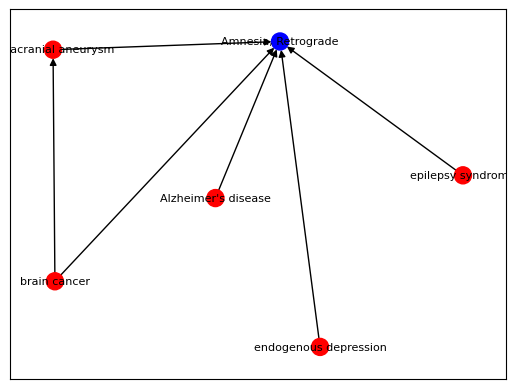

In [16]:
# We will create the subgraph relating to said symptom
related_diseases = list(edgelist.predecessors(amnesia_ret))
symptom_subgraph = symdis_subgraph.subgraph([amnesia_ret] + related_diseases)

# We want node labels to be the name of the node, which are contained in the nodes dataframe
colors = ['red' if symptom_subgraph.nodes[node]['kind'] == 'Disease' else 'blue' for node in symptom_subgraph]
node_labels = {node: nodes[nodes['id']==node]['name'].iloc[0] for node in symptom_subgraph.nodes()}
nx.draw_networkx(G=symptom_subgraph, node_size=150, node_color=colors, with_labels=True, labels=node_labels, font_size=8)

In order to have a diagnosis, we define some measures that will help us choose the most probable disease.
- **Number of connected symptoms:** We check for the number of connected symptoms to each disease. If a disease has a big number of symptoms there is a lower chance that our patient actually has that disease.
- **Number of connected genes:** We check for the number of genes to which each disease is connected to.
- **Betweenness centrality:** defined as an index measure which tells us how much the node is involved in shortest paths between nodes. An higher value means that the disease is more involved in the overall graph when it comes to connecting nodes, this includes other node types that lead to our symptom of interest.

Since we don’t have additional information about the patient, we’re going to use the aforementioned measures in order to select a disease.

Given additional information, the following checks can be done:
- Check if the patient has other symptoms from the ones connected to each of diseases we have listed.
- If genetic data of the patient is available, check for the genes that are associated with each disease. This can help match the patient’s genetic traits to those known to be associated with specific diseases. We can also check the for genes up… or under… by each disease.
- Consider the anatomical context of the symptom. For each disease check the anatomies affected by the disease or related to it. This can help determine if the disease is known to affect a particular body part or system that correlates with the symptom.
- Based on the list of potential diseases, determine what additional diagnostic tests might help in further narrowing down the diagnosis.

Performing these checks should narrow down the range of possible choices to few possible candidates, by performing the appropriate tests we can have a diagnosis for our patient.

In [17]:
# Warning: this code takes a while
# betw = nx.betweenness_centrality(edgelist, k=1000)
# with open('betw.pickle', 'wb') as f:
#     pickle.dump(betw, f)

with open('betw.pickle', 'rb') as f:
    betw = pickle.load(f)

In [18]:
def disease_features(disease, graph):
    connections = graph.edges(disease, data=True)
    features = {
        'connected_symptoms': 0,
        'connected_genes': 0,
        'betweenness_centrality': betw[disease]
    }
    
    for _, target, _ in connections:
        node_type = graph.nodes[target]['kind']
        if node_type == 'Symptom':
            features['connected_symptoms'] += 1
        elif node_type == 'Gene':
            features['connected_genes'] += 1
    
    return features

d = {edgelist.nodes[disease]['name']: disease_features(disease, edgelist) for disease in related_diseases}

df = pd.DataFrame(d).T
display(df)


,connected_symptoms,connected_genes,betweenness_centrality
intracranial aneurysm,50.0,23.0,3.590837e-07
Alzheimer's disease,44.0,685.0,2.257420e-04
epilepsy syndrome,64.0,399.0,1.319269e-03
brain cancer,88.0,111.0,7.810917e-06
endogenous depression,53.0,33.0,1.711393e-04


Looking at the possible diseases, we decide to further analyse the brain cancer case.

In [19]:
disease_name = "brain cancer"
disease_id = get_id_by_name(disease_name, edgelist)

Next, we look for the compounds alleviating significant symptoms of the disease.

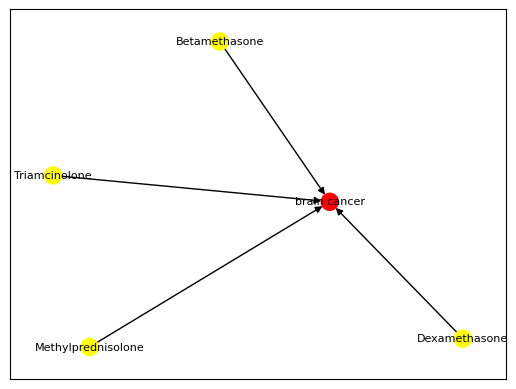

In [20]:
def diseasecomp_subgraph(graph, disease_id, edgetype):
    edge_nodes = {(u, v) for u, v, data in graph.edges(data=True) if data.get('type') == edgetype and (u == disease_id or v == disease_id)}
    return graph.edge_subgraph(edge_nodes).copy()

disease_subg_cpd = diseasecomp_subgraph(edgelist, disease_id, 'CpD') #CpD = compound-palliates-disease
colors = ['red' if disease_subg_cpd.nodes[node]['kind'] == 'Disease' else 'yellow' for node in disease_subg_cpd]
node_labels = {node: data.get('name') for node, data in disease_subg_cpd.nodes(data=True)}
nx.draw_networkx(disease_subg_cpd, node_size=150, node_color=colors, with_labels=True, labels=node_labels, font_size=8)

Although these may alleviate the symptom, we must look for something which can treat it as a whole.

Now, we check for the compounds treating the disease, and the corresponding number of side effects. We sort the compounds according to the number of side effects.

In [21]:
#Subgraph with compounds treating the disease
disease_subg_ctd = diseasecomp_subgraph(edgelist, disease_id, 'CtD')

#Graph connecting compounds threating the disease with side effects
edge_nodes_se = {(u, v) for u, v, data in edgelist.edges(data=True) if data.get('type') == 'CcSE' and u in disease_subg_ctd}
se_graph = edgelist.edge_subgraph(edge_nodes_se)

compound_nodes = [node for node, attr in se_graph.nodes(data=True) if attr.get('kind') == 'Compound']
out_degrees_se = dict(sorted({node: se_graph.out_degree(node) for node in compound_nodes}.items(), key=lambda x: x[1], reverse=True))

out_degrees_se

{'Compound::DB00853': 241,
 'Compound::DB00262': 177,
 'Compound::DB00773': 153,
 'Compound::DB01168': 137,
 'Compound::DB01005': 130,
 'Compound::DB01206': 44,
 'Compound::DB00958': 7}

In [22]:
#Subgraph with compounds treating the disease
disease_subg_ctd = diseasecomp_subgraph(edgelist, disease_id, 'CtD')

#Graph connecting compounds threating the disease with side effects
edge_nodes_se = {(u, v) for u, v, data in edgelist.edges(data=True) if data.get('type') == 'CcSE' and u in disease_subg_ctd}
se_graph = edgelist.edge_subgraph(edge_nodes_se)

compound_nodes = [node for node, attr in se_graph.nodes(data=True) if attr.get('kind') == 'Compound']
out_degrees_se = dict(sorted({get_name_by_id(node, se_graph): se_graph.out_degree(node) for node in compound_nodes}.items(), key=lambda x: x[1], reverse=True))

se_df = pd.DataFrame(out_degrees_se, index=['Number of Possible side-effects']).T
display(se_df)

,Number of Possible side-effects
Temozolomide,241
Carmustine,177
Etoposide,153
Procarbazine,137
Hydroxyurea,130
Lomustine,44
Carboplatin,7


The compounds found belong to different pharmacologic classes, we know that classes include more than one compound, and one compound may belong to more than one class. We assume that the presence of at least on compound from each class is necessary in order to treat the disease. This way we may give more support to the doctor in making a treatment decision.

In [23]:
#Subgraph with compounds treating the disease
edge_nodes = {(u, v) for u, v, data in edgelist.edges(data=True) if data.get('type') == 'PCiC' and (u in compound_nodes or v in compound_nodes)}
pharma_subg = edgelist.edge_subgraph(edge_nodes)

pharma_classes = set(node for node, data in pharma_subg.nodes(data=True) if data.get('kind') == 'Pharmacologic Class')
ph = {get_name_by_id(i, pharma_subg): [get_name_by_id(j, pharma_subg) for j in pharma_subg.neighbors(i)] for i in pharma_classes}
for i in ph:
    print(f'{i} ---> {ph[i]}')

Topoisomerase Inhibitors ---> ['Etoposide']
Platinum-containing Compounds ---> ['Carboplatin']
Alkylating Activity ---> ['Procarbazine', 'Carmustine', 'Temozolomide', 'Lomustine']
Urea ---> ['Hydroxyurea']


In the next section, we try to make a treatment for the patient by selecting a compound from each pharmacologic class in a way that also minimises the side effects resulting from the compounds. The treatment prescribed to the patient should be made of drugs containing the selected compounds.

In [26]:
#Compounds from each class having minimal side effects
compounds = [min(compound_list, key=lambda x: out_degrees_se[x]) for compound_list in ph.values()]
compounds

['Etoposide', 'Carboplatin', 'Lomustine', 'Hydroxyurea']

Total side effects

In [27]:
sum(out_degrees_se[i] for i in compounds)

334

We notice that these compounds can have shared side effects and therefore they can be counted twice. For this reason, we develop an algorithm that gets the compounds from each pharmacologic class minimising unique side effects.
The algorithm starts by getting the compound with the minimum side effects from any pharmacologic class. Then the side effects of the selected compound are removed from the graph (linking compounds with side effects) so they don't get considered twice and the pharmacologic class from which the compound was picked is no longer considered. Next, the second is chosen by getting the node with minimal side effects from the new graph. This procedure is repeated until all the pharmacologic classes are visited. At the end we get the compounds with minimal side effects, and each compound belongs to a different pharmacologic class.

In [28]:
se_copy = se_graph.copy()

def count_unique_side_effects(compound, graph):
    return len(list(graph.successors(compound)))

def remove_side_effects(compound, graph):
    for se in list(graph.successors(compound)):
        graph.remove_node(se)

total_side_effects = 0
selected_compounds = {}
remaining_classes = set(ph.keys())
while remaining_classes:
    min_effects = float('inf')
    best_compound = None
    best_class = None

    for ph_class in remaining_classes:
        for compound in ph[ph_class]:
            count = count_unique_side_effects(get_id_by_name(compound, se_copy), se_copy)
            if count < min_effects:
                min_effects = count
                best_compound = compound
                best_class = ph_class
    
    total_side_effects += min_effects

    selected_compounds[best_class] = best_compound
    remove_side_effects(get_id_by_name(best_compound, se_copy), se_copy)
    remaining_classes.remove(best_class)

selected_compounds_list = [get_id_by_name(i, se_graph) for i in selected_compounds.values()]
df = pd.DataFrame(selected_compounds, index=['Selected Compound']).T
display(df)

,Selected Compound
Platinum-containing Compounds,Carboplatin
Alkylating Activity,Lomustine
Urea,Hydroxyurea
Topoisomerase Inhibitors,Etoposide


In [29]:
print("Number of compounds selected: ",len(set(selected_compounds.values())))

Number of compounds selected:  4


In [30]:
"Number of unique side effects after filtering: ", total_side_effects

('Number of unique side effects after filtering: ', 253)

The number of side effects is considerably diminished. Drugs containing the compounds listed above should be selected in order to treat hypertension while minimising the possible side effects

In [31]:
disease_graph = nx.DiGraph()
edge_nodes = {(u, v) for u, v, data in edgelist.edges(data=True) if (data.get('type') == 'CpD' or (u in selected_compounds_list+[amnesia_ret] or v in selected_compounds_list+[amnesia_ret])) and (u == disease_id or v == disease_id)}
disease_graph = edgelist.edge_subgraph(edge_nodes).copy()
colors = []
for node in disease_graph:
    if disease_graph.nodes[node]['kind'] == 'Compound':
        if node in selected_compounds_list:
            colors.append('green')
        else:
            colors.append('yellow')
    elif disease_graph.nodes[node]['kind'] == 'Disease':
        colors.append('red')
    else:
        colors.append('blue')
node_labels = {node: data.get('name') for node, data in disease_graph.nodes(data=True)}

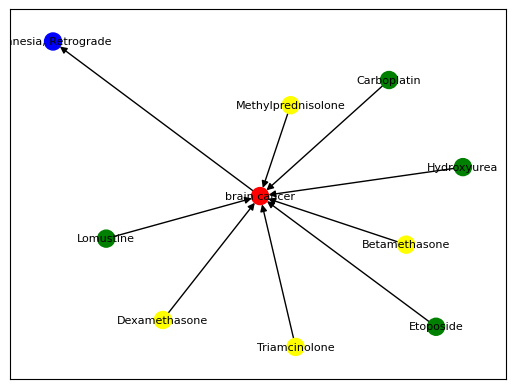

In [32]:
nx.draw_networkx(disease_graph, node_size=150, with_labels=True, labels=node_labels, font_size=8,node_color=colors)